In [17]:
import sys
sys.path.insert(0,'../src')
sys.path.insert(0,'../data')
sys.path.insert(0,'../upload_data')
sys.path.insert(0,'../config')
import geopandas as gpd
import pandas as pd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import etl
import json

In [4]:
%load_ext autoreload
%autoreload 2

In [30]:
census_fp = '../upload_data/sd_population.csv'
census =  pd.read_csv(census_fp)

In [38]:
with open('../config/data-Params.json') as fh:
    data_cfg = json.load(fh)

In [39]:
data_cfg

{'start_date': [[2017, 7, 5],
  [2017, 12, 16],
  [2017, 9, 22],
  [2017, 6, 12],
  [2014, 7, 8],
  [2015, 12, 28],
  [2018, 6, 15],
  [2017, 2, 1]],
 'end_date': [[2017, 11, 5],
  [2018, 4, 16],
  [2018, 1, 22],
  [2017, 10, 12],
  [2014, 11, 8],
  [2016, 4, 28],
  [2018, 10, 15],
  [2017, 6, 1]],
 'keyword': [['DACA'],
  ['Black Panther'],
  ['Coco'],
  ['Unite the Right'],
  ['Ray Rice'],
  ['Leonardo DiCaprio'],
  ['Crazy Rich Asians'],
  ['North Korea war']],
 'years': [2014, 2015, 2016, 2017, 2018],
 'ripa_suffixes': ['stops_datasd_v1.csv',
  'stop_result_datasd.csv',
  'stop_reason_datasd.csv',
  'search_basis_datasd.csv',
  'race_datasd.csv',
  'prop_seize_type_datasd.csv',
  'contraband_evid_datasd.csv',
  'actions_taken_datasd.csv'],
 'ripa_columns': [['stop_id',
   'date_stop',
   'time_stop',
   'beat',
   'perceived_age',
   'perceived_gender'],
  ['stop_id', 'result'],
  ['stop_id', 'reason_for_stop'],
  ['stop_id', 'basis_for_search'],
  ['stop_id', 'race'],
  ['stop_id'

In [40]:
etl.get_data(**data_cfg)

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
def make_heatmap_df():
    info = {'beats': area.beats,
            'serv' : area.serv,
            'div' : area.div,
            
            
           }
    return pd.Dataframe(data = info)

In [25]:
areas = gpd.read_file('http://seshat.datasd.org/sde/pd/pd_beats_datasd.zip')

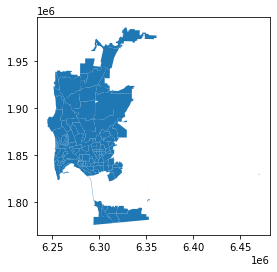

In [26]:
areas.plot()

In [27]:
areas = areas.drop(['objectid', 'name'],axis = 1)
areas

,beat,div,serv,geometry
0,935,9,930,"MULTIPOLYGON (((6268975.465 1931147.469, 62689..."
1,0,0,0,"MULTIPOLYGON (((6261648.576 1836846.672, 62616..."
2,511,5,510,"MULTIPOLYGON (((6261640.429 1836823.561, 62616..."
3,722,7,720,"POLYGON ((6302781.000 1793246.001, 6302905.000..."
4,314,3,310,"POLYGON ((6284667.652 1874418.895, 6284694.392..."
...,...,...,...,...
135,243,2,240,"POLYGON ((6295777.084 1908435.558, 6295790.126..."
136,937,9,930,"POLYGON ((6295209.132 1952772.422, 6295208.647..."
137,936,9,930,"POLYGON ((6287497.113 1936631.116, 6287462.453..."
138,233,2,230,"POLYGON ((6306176.245 1943421.146, 6306158.416..."


In [28]:
areas.dtypes

beat           int64
div            int64
serv           int64
geometry    geometry
dtype: object

In [31]:
census

,YEAR,beat,serv,Total,White,Hispanic,Black,N,Asian,U & P,O,Two or More Races
0,2010,111,110,25358,15779,5866,1346,166,3882,147,2379,1659
1,2010,112,110,9785,8018,1247,162,67,680,32,382,444
2,2010,113,110,11966,9442,2340,160,81,660,36,977,610
3,2010,114,110,14870,10251,3715,259,115,1580,66,1773,826
4,2010,115,110,49029,28823,4690,790,90,15554,86,1582,2104
...,...,...,...,...,...,...,...,...,...,...,...,...
120,2010,933,930,6585,5693,360,46,15,525,5,62,239
121,2010,934,930,43817,29950,3206,343,68,10994,36,620,1806
122,2010,935,930,4836,3446,404,54,10,1038,3,57,228
123,2010,936,930,4163,2390,476,121,5,1268,7,151,221


In [35]:
census[census['Hispanic'] == 0]

,YEAR,beat,serv,Total,White,Hispanic,Black,N,Asian,U & P,O,Two or More Races
119,2010,932,930,4,1,0,1,0,0,0,2,0


In [ ]:
def div_op(row):
    try:
        return row[race+'_1']/row[race+'_2']
    except:
        return row[race+'_1']
    
def make_proportion(race):
    sub1 = census['beat','serv','div',race]
    df = census.merge(stops['beat','serv','div',race], on = ['beat'], how = 'outer')
    df[race] = df.apply(lambda x: div_op(x))
    return df['beat','serv','div',race]

def make_merged():
    census_fp = '../upload_data/sd_population.csv'
    census =  pd.read_csv(census_fp)
    areas = gpd.read_file('http://seshat.datasd.org/sde/pd/pd_beats_datasd.zip')
    areas = areas.drop(['objectid', 'name'],axis = 1)
    for race in ['White','Asian', 'Black','Hispanic']
        heat = areas.merge(make_prop(race), on=['beat'],how = 'outer')
    heat = heat.dropna()
    return heat
    

In [36]:
2/0

ZeroDivisionError: division by zero

In [ ]:
heat = areas.merge(census, on=['beat','serv'],how = 'outer')

In [10]:
heat

,beat,div,serv,geometry,YEAR,Total,White,Hispanic,Black,N,Asian,U & P,O,Two or More Races
0,935,9,930,"MULTIPOLYGON (((6268975.465 1931147.469, 62689...",2010.0,4836.0,3446.0,404.0,54.0,10.0,1038.0,3.0,57.0,228.0
1,0,0,0,"MULTIPOLYGON (((6261648.576 1836846.672, 62616...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,511,5,510,"MULTIPOLYGON (((6261640.429 1836823.561, 62616...",2010.0,16576.0,9186.0,5778.0,2734.0,238.0,907.0,96.0,2525.0,890.0
3,511,5,510,"POLYGON ((6283949.000 1837581.000, 6284299.000...",2010.0,16576.0,9186.0,5778.0,2734.0,238.0,907.0,96.0,2525.0,890.0
4,722,7,720,"POLYGON ((6302781.000 1793246.001, 6302905.000...",2010.0,15965.0,7705.0,11429.0,657.0,139.0,2150.0,80.0,4445.0,789.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,243,2,240,"POLYGON ((6295777.084 1908435.558, 6295790.126...",2010.0,5217.0,3697.0,1049.0,505.0,63.0,245.0,34.0,323.0,350.0
136,937,9,930,"POLYGON ((6295209.132 1952772.422, 6295208.647...",2010.0,6653.0,4561.0,649.0,218.0,13.0,1231.0,11.0,181.0,438.0
137,936,9,930,"POLYGON ((6287497.113 1936631.116, 6287462.453...",2010.0,4163.0,2390.0,476.0,121.0,5.0,1268.0,7.0,151.0,221.0
138,233,2,230,"POLYGON ((6306176.245 1943421.146, 6306158.416...",2010.0,46380.0,27295.0,4460.0,1144.0,149.0,13723.0,138.0,1168.0,2763.0


In [11]:
heat = heat.dropna()
heat

,beat,div,serv,geometry,YEAR,Total,White,Hispanic,Black,N,Asian,U & P,O,Two or More Races
0,935,9,930,"MULTIPOLYGON (((6268975.465 1931147.469, 62689...",2010.0,4836.0,3446.0,404.0,54.0,10.0,1038.0,3.0,57.0,228.0
2,511,5,510,"MULTIPOLYGON (((6261640.429 1836823.561, 62616...",2010.0,16576.0,9186.0,5778.0,2734.0,238.0,907.0,96.0,2525.0,890.0
3,511,5,510,"POLYGON ((6283949.000 1837581.000, 6284299.000...",2010.0,16576.0,9186.0,5778.0,2734.0,238.0,907.0,96.0,2525.0,890.0
4,722,7,720,"POLYGON ((6302781.000 1793246.001, 6302905.000...",2010.0,15965.0,7705.0,11429.0,657.0,139.0,2150.0,80.0,4445.0,789.0
5,314,3,310,"POLYGON ((6284667.652 1874418.895, 6284694.392...",2010.0,5184.0,3223.0,1199.0,502.0,57.0,663.0,36.0,340.0,363.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,243,2,240,"POLYGON ((6295777.084 1908435.558, 6295790.126...",2010.0,5217.0,3697.0,1049.0,505.0,63.0,245.0,34.0,323.0,350.0
136,937,9,930,"POLYGON ((6295209.132 1952772.422, 6295208.647...",2010.0,6653.0,4561.0,649.0,218.0,13.0,1231.0,11.0,181.0,438.0
137,936,9,930,"POLYGON ((6287497.113 1936631.116, 6287462.453...",2010.0,4163.0,2390.0,476.0,121.0,5.0,1268.0,7.0,151.0,221.0
138,233,2,230,"POLYGON ((6306176.245 1943421.146, 6306158.416...",2010.0,46380.0,27295.0,4460.0,1144.0,149.0,13723.0,138.0,1168.0,2763.0


In [12]:
heat.W.min()

AttributeError: 'GeoDataFrame' object has no attribute 'W'

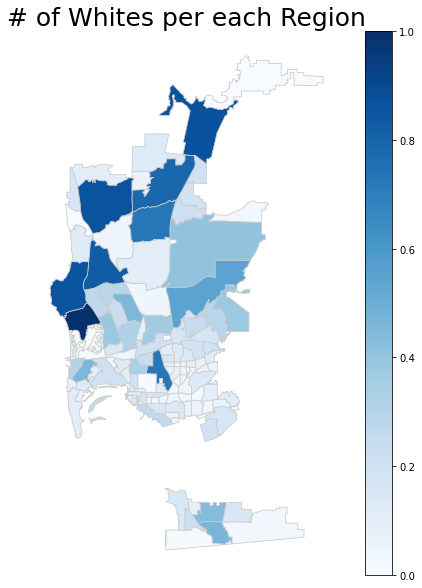

In [18]:
variable = 'W'
vmin, vmax = 0, 40000
fig, ax = plt.subplots(1, figsize=(10,10))
ax.axis('off')
ax.set_title('# of c per each Region', fontdict={'fontsize':'25','fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
fig.colorbar(sm)
heat.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

In [13]:
def population_heat(table, race):
    vmin, vmax = 0, roundup(table[race].max())
    fig, ax = plt.subplots(1, figsize=(10,10))
    ax.axis('off')
    ax.set_title('# of {r} per each Region'.format(r = race), fontdict={'fontsize':'25','fontweight' : '3'})
    sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    fig.colorbar(sm)
    table.plot(column=race, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

In [14]:
def make_merged():
    census_fp = '../upload_data/sd_population.csv'
    census =  pd.read_csv(census_fp)
    areas = gpd.read_file('http://seshat.datasd.org/sde/pd/pd_beats_datasd.zip')
    areas = areas.drop(['objectid', 'name'],axis = 1)
    heat = areas.merge(census, on=['beat','serv'],how = 'outer')
    heat = heat.dropna()
    return heat

In [15]:
def roundup(x):
    return x if x % 100 == 0 else x + 100 - x % 100

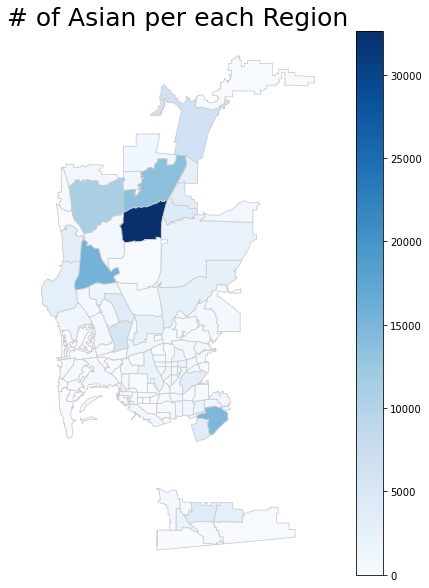

In [20]:
population_heat(heat,'Asian')